# Creating a Class for Video Mixing Block

In [1]:
from pynq import Overlay
import pynq.lib.video
import pynq.lib.audio
from pynq import DefaultIP
from pynq import allocate

In [2]:
from PPFunctions_Live import *
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
class VideoMixer(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
        self._MAX_HEIGHT = 1080
        self._MAX_WIDTH = 1920
        
    bindto = ['xilinx.com:ip:v_mix:5.1']
    
    ## Layer Enable Properties:
    @property
    def en_layer(self):
        return self.read(0x40)
    
    @en_layer.setter
    def en_layer(self, layer_id):
        return self.write(0x40, layer_id)
    
    ## Base Layer Properties:
    @property
    def _control(self):
        return self.read(0x00)
    
    @_control.setter
    def _control(self, value):
        return self.write(0x00, value)
    
    @property
    def base_width(self):
        return self.read(0x10)
    
    @base_width.setter
    def base_width(self, w_value):
        if (w_value < 64) and (w_value > self._MAX_WIDTH):
            raise ValueError('Bad Width!')
        if type(w_value) != int:
            raise TypeError('Bad Width Datatype!')
        self.write(0x10, w_value)
        
    @property
    def base_height(self):
        return self.read(0x18)
    
    @base_height.setter
    def base_height(self, h_value):
        if (h_value < 64) or (h_value > self._MAX_HEIGHT):
            raise ValueError('Bad Height!')
        if type(h_value) != int:
            raise TypeError('Bad Height Datatype!')
        self.write(0x18, h_value)
    
    ## 1st Overlay Properties:
        ## Alpha Value of Overlay:
    @property
    def first_alpha(self):
        return self.read(0x200)
    @first_alpha.setter
    def first_alpha(self, alpha_value):
        if (alpha_value < 0) or (alpha_value > 256):
            raise ValueError('Alpha Value Outside Conditions')
        self.write(0x200, alpha_value)
    
        ## Defining the Coordinates of X and Y Positions of the Overlay:
    @property
    def start_x(self):
        return self.read(0x208)
    @start_x.setter
    def start_x(self, x_value):
        if (x_value < 0) or (x_value > self._MAX_WIDTH):
             raise ValueError('x value outwith width constraints')
        if type(x_value) != int:
            raise TypeError('Bad Height Datatype!')
        self.write(0x208, x_value)
    @property
    def start_y(self):
        return self.read(0x210)
    @start_y.setter
    def start_y(self, y_value):
        if (y_value < 0) or (y_value > self._MAX_HEIGHT):
             raise ValueError('y value outwith height constraints')
        if type(y_value) != int:
            raise TypeError('Bad Height Datatype!')
        self.write(0x210, y_value)
        
        ## Defining width and height of overlaid image:
    @property
    def layer_width(self):
        return self.read(0x218)
    @layer_width.setter
    def layer_width(self, lw_value):
        if (lw_value < 0) or (lw_value > self._MAX_WIDTH):
            raise ValueError('Bad Width!')
        if type(lw_value) != int:
            raise TypeError('Bad Width Datatype!')
        self.write(0x218, lw_value)
    
    @property
    def layer_height(self):
        return self.read(0x228)
    @layer_height.setter
    def layer_height(self, lh_value):
        if (lh_value < 0) or (lh_value > self._MAX_WIDTH):
            raise ValueError('Bad Width!')
        if type(lh_value) != int:
            raise TypeError('Bad Width Datatype!')
        self.write(0x228, lh_value)
    
    ## Starting Class with Internal Operations:
    def start(self):
        self._control = 137

class VideoOverlay(Overlay):
    def __init__(self, bitstream, **kwargs):
        super().__init__(bitstream, **kwargs)
        
        self.audio = self.audio_codec_ctrl_0
        self.audio.configure()

In [ ]:
class VideoMixer(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
        self._MAX_HEIGHT = 1080
        self._MAX_WIDTH = 1920
        
    bindto = ['xilinx.com:ip:v_mix:5.1']
    
    ## Layer Enable Properties:
    @property
    def en_layer(self):
        return self.read(0x40)
    @en_layer.setter
    def en_layer(self, layer_id):
        return self.write(0x40, layer_id)
    
    ## Base Layer Properties:
    @property
    def _control(self):
        return self.read(0x00)
    @_control.setter
    def _control(self, value):
        return self.write(0x00, value)
    
    @property
    def base_width(self):
        return self.read(0x10)
    @base_width.setter
    def base_width(self, w_value):
        if (w_value < 64) and (w_value > self._MAX_WIDTH):
            raise ValueError('Bad Width!')
        if type(w_value) != int:
            raise TypeError('Bad Width Datatype!')
        self.write(0x10, w_value)
        
    @property
    def base_height(self):
        return self.read(0x18)
    @base_height.setter
    def base_height(self, h_value):
        if (h_value < 64) or (h_value > self._MAX_HEIGHT):
            raise ValueError('Bad Height!')
        if type(h_value) != int:
            raise TypeError('Bad Height Datatype!')
        self.write(0x18, h_value)
    
    ## Starting Class with Internal Operations:
    def start(self):
        self._control = 137

class VideoOverlay(Overlay):
    def __init__(self, bitstream, **kwargs):
        super().__init__(bitstream, **kwargs)
        
        self.audio = self.audio_codec_ctrl_0
        self.audio.configure()

## Creating Instance of VDMA

## Following Blocks are Used to Project 1 Layer:

In [3]:
# ol = VideoOverlay('layer0_pynq_s2t.bit')
ol = VideoOverlay('pynq_s2t.bit')
ol.video_mixer.start()

NameError: name 'VideoOverlay' is not defined

In [ ]:
# frame_height = 1079
# frame_width = 1440
frame_height = 1080
frame_width = 1920

In [5]:
# 1920 x 1080 Monitor but that is larger than the 
ol.video_mixer.base_height = 1080
ol.video_mixer.base_width = 1920

ol.video_mixer.base_height = frame_height
ol.video_mixer.base_width = frame_width

ol.video_mixer.en_layer = 1  # if base layer alone

In [6]:
hdmi_in = ol.video.hdmi_in
hdmi_out = ol.video.hdmi_out

In [7]:
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

In [8]:
hdmi_in.tie(hdmi_out)

In [9]:
hdmi_out.close()
hdmi_in.close()

## Base Layer With Overlay:

In [5]:
ol = VideoOverlay('pynq_s2t.bit')
ol.video_mixer.start()

### Frame Conditions:

In [10]:
frame_height = 1079
frame_width = 1440

### Overlay Conditions:

In [11]:
    # Number of Active Layers:
layer_number = 2**0 + 2**1  

    # Top left Coordinates of the overlay 
topleft_x = int(10)
topleft_y = int(frame_height - 50)

    # width and height of the overlay
overlay_width = int(frame_width - 2 * topleft_x)
overlay_height = int(40)

    # alpha value of overlay
alpha_val = 255

### Colour space

In [12]:
colorspace_in = ol.video.hdmi_in.color_convert
colorspace_out = ol.video.hdmi_out.color_convert

bgr2rgb = [0, 0, 1,
           0, 1, 0, 
           1, 0, 0,
           0, 0, 0]

colorspace_in.colorspace = bgr2rgb
colorspace_out.colorspace = bgr2rgb

### Defining the Output Layer Operations:

In [13]:
ol.video_mixer.en_layer = layer_number  

## Physical Shape of the Frame:
ol.video_mixer.base_height = frame_height
ol.video_mixer.base_width = frame_width

ol.video_mixer.start_x = topleft_x
ol.video_mixer.start_y = topleft_y

ol.video_mixer.layer_height = overlay_height
ol.video_mixer.layer_width = overlay_width

ol.video_mixer.first_alpha = alpha_val

### Defining the Input and Output HDMI Blocks:

In [14]:
hdmi_in = ol.video.hdmi_in
hdmi_out = ol.video.hdmi_out

In [15]:
hdmi_in.configure() 
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

### Writing image to VDMA

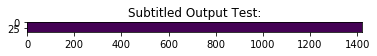

In [9]:
## creating black frame with optional subtitles on top:
data = np.zeros((overlay_height, overlay_width), dtype=np.uint8)
tr = overlay_width, 0     # top right coordinate
bl = 0, overlay_height    # bottom left coordinate

frame = cv2.rectangle(data, tr, bl, (0, 0, 0), -1)

plt.imshow(frame)
plt.title('Subtitled Output Test:')
plt.show()

In [10]:
bl = 0, overlay_height


ba = (bl[1] - 2)
ba

38

In [15]:
def putText(frame, sub, bl):
    clone = frame.copy()
    
    bl_x = bl[0]
    bl_y = (bl[1] - 2)
    
    # font constraints for opencv put text:
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.4

    # Image Variables to display text on rectangle:
    image = cv2.putText(clone, sub, (bl_x, bl_y), font, font_scale, (255, 255, 255), 2, cv2.LINE_AA)
    
    return image

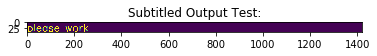

In [16]:
sub = "please work"
image = putText(frame, sub, bl)

plt.imshow(image)
plt.title('Subtitled Output Test:')
plt.show()

### Writing to the Output of the Video Mixer:

In [16]:
hdmi_in.tie(hdmi_out)

In [17]:
hdmi_out.close()
hdmi_in.close()